# Anomaly and novelty detection based on the Normal distribution

**Anomaly (outlier) detection**: an *anomaly*, or *outlier*, is data which is defined as an observation far from the others. Estimators used for anomaly detection try therefore to fit the regions where the training data is the most concentrated, ignoring the deviant observations. Anomaly detection is then a decision problem.

**Novelty detection**: *novelty detection* consists in estimating whether a new observation is an anomaly or a normal datum. In this context, an anomaly is also called a novelty. Novelty detection predicts labels (decision problem) or computes the score of abnormality of new unseen data (estimation).

## Setup

First, import a few common modules, and check whether Python 3.5 or later and Scikit-Learn 0.20 or later are installed.

In [2]:
# Python ≥ 3.5 required
import sys
assert sys.version_info >= (3, 5)

# Scikit-learn ≥ 0.20 required
import sklearn
assert sklearn.__version__ >= "0.20"

# Common imports
import numpy as np
import os

# To reproduce identically the tasks performed in this notebook at each run
np.random.seed(42)

# To plot figures using Matplotlib
%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt
# Setting Matplotlib rc (initialisation) parameters
mpl.rc('axes', labelsize=14) # overwritten by `plt.xlabel(fontsize=)` and `plt.ylabel(fontsize=)`
mpl.rc('xtick', labelsize=12)
mpl.rc('ytick', labelsize=12)

In [27]:
from sklearn.datasets import load_iris

## Data loading

In [85]:
data = load_iris()
X = data.data
Y = data.target
data.target_names

array(['setosa', 'versicolor', 'virginica'], dtype='<U10')

First five data:

In [86]:
X[:5]

array([[5.1, 3.5, 1.4, 0.2],
       [4.9, 3. , 1.4, 0.2],
       [4.7, 3.2, 1.3, 0.2],
       [4.6, 3.1, 1.5, 0.2],
       [5. , 3.6, 1.4, 0.2]])

In [87]:
X.shape

(150, 4)

In [88]:
Y

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

In [89]:
Y.shape

(150,)

## Data ploting

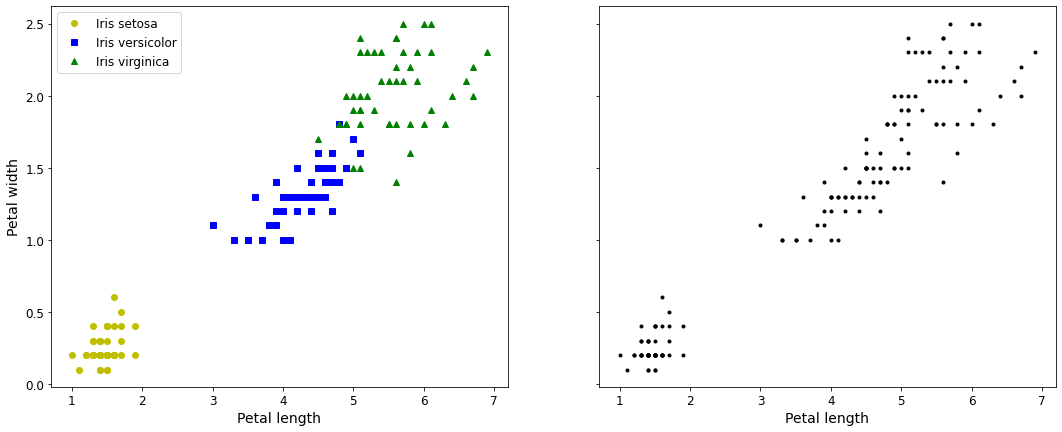

In [133]:
def plot_data(X, Y):
    plt.figure(figsize=(18, 7))

    plt.subplot(121)
    plt.plot(X[Y==0, 2], X[Y==0, 3], "yo", label="Iris setosa")
    plt.plot(X[Y==1, 2], X[Y==1, 3], "bs", label="Iris versicolor")
    plt.plot(X[Y==2, 2], X[Y==2, 3], "g^", label="Iris virginica")
    plt.xlabel("Petal length", fontsize=14)
    plt.ylabel("Petal width", fontsize=14)
    plt.legend(fontsize=12)

    plt.subplot(122)
    plt.scatter(X[:, 2], X[:, 3], c="k", marker=".")
    plt.xlabel("Petal length", fontsize=14)
    plt.tick_params(labelleft=False)

    plt.show()

plot_data(X, Y)

## Anomaly detection

Analyse one cluster, here that corresponding to "setosa", i.e. $y = 0$

In [149]:
Xp = X[Y==0]
Yp = Y[Y==0]

Data's multi-dimensional average:

In [135]:
M = np.mean(Xp, axis=0)
M

array([5.006, 3.428, 1.462, 0.246])

Data's covariance:

In [136]:
Cov = np.cov(Xp, rowvar=False)
Cov

array([[0.12424898, 0.09921633, 0.0163551 , 0.01033061],
       [0.09921633, 0.1436898 , 0.01169796, 0.00929796],
       [0.0163551 , 0.01169796, 0.03015918, 0.00606939],
       [0.01033061, 0.00929796, 0.00606939, 0.01110612]])

The trace of the covariance matrix, $tr(Cov)$, can be considered as a multi-dimensional generalisation of the univariate variable variance, or in other terms an *overall variance*:

In [137]:
v = np.matrix.trace(Cov)
v

0.30920408163265306

Standard deviation

In [138]:
s = np.sqrt(v)
s

0.5560612211192695

In [139]:
def std(X):
    return np.sqrt(np.matrix.trace(np.cov(X, rowvar=False)))

Number of outliers according to the rule $||x - m|| \geq 3 \sigma$, which consists in excluding data that do not lie within $3 \sigma$ from the mean, i.e. in about 99,7% of the data if their probability distribution were approximately normal, because 99,7% of the outcomes of a normal distribution lie within $23 \sigma$ from the mean. According to this rule, outliers lie then in the remaining 0.3%.

In [142]:
len(np.where(np.linalg.norm(Xp - M, axis=1) >= 3 * s)[0])

0

Number of outliers according to the rule $||x - m|| \geq 2 \sigma$, which consists in excluding data that do not lie within $2 \sigma$ from the mean, i.e. in about 95% of the data if their probability distribution were approximately normal, because 95% of the outcomes of a normal distribution lie within $2 \sigma$ from the mean. According to this rule, outliers lie then in the remaining 5%.

In [143]:
len(np.where(np.linalg.norm(Xp - M, axis=1) >= 2 * s)[0])

2

Normal data, which are not anomalies, i.e. data that lie within $2 \sigma$ from the mean:

In [117]:
cleaned_Xp = Xp[np.where(np.linalg.norm(Xp - M, axis=1) <= 2 * s)[0]]
cleaned_Y = Y[np.where(np.linalg.norm(Xp - M, axis=1) <= 2 * s)[0]]

Function to clean data:

In [150]:
def normal_clean(X, Y, std_radius=2):
    M = np.mean(X, axis=0)
    s = np.sqrt(np.matrix.trace(np.cov(X, rowvar=False)))
    normal_ids = np.where(np.linalg.norm(X - M, axis=1) <= std_radius * s)[0]
    
    return X[normal_ids], Y[normal_ids]

cleaned_Xp, cleaned_Yp = normal_clean(Xp, Yp, 2)
cleaned_Xp.shape, cleaned_Yp.shape

((48, 4), (48,))

## Novelty detection

Function to detect a novelty:

In [155]:
def detect_novelty(X, x, std_radius=2):
    x = np.reshape(x, (1,4))
    # `X_p`: X prime
    X_p = np.append(X, x, axis=0)
    M = np.mean(X_p, axis=0)
    s = std(X)
    
    return 1 if np.linalg.norm(x - M) <= std_radius * s \
        else -1

In [156]:
detect_novelty(X, [7.1, 5.5, 3.4, 2.2])

1